In [1]:
import numpy 
import time, sys
from matplotlib import pyplot

In [5]:
nx = 51
dx = 2 / (nx - 1)
nt = 25     #nt is the number of timesteps we want to calculate
dt = 0.025  #dt is the amount of time each timestep covers (delta t)
c = 1       #assume wavespeed of c = 1

In [8]:
u = numpy.ones(nx)
u[int(0.5 / dx) : int(1/dx + 1)] = 2

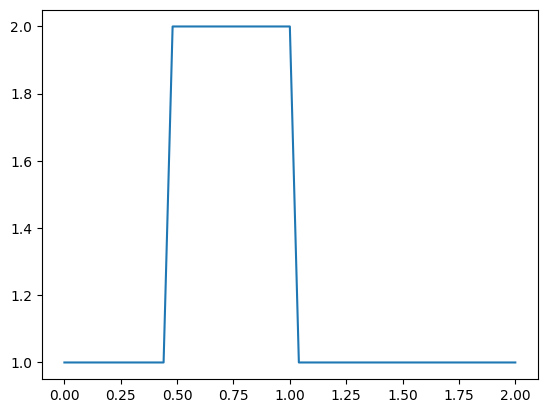

In [12]:
pyplot.plot(numpy.linspace(0, 2, nx), u);

In [13]:
un = numpy.ones(nx)

for t in range(0, nt):
    un = u.copy()
    for i in range(1, nx):
        u[i] = un[i] - c * dt / dx * (un[i] - un[i-1])

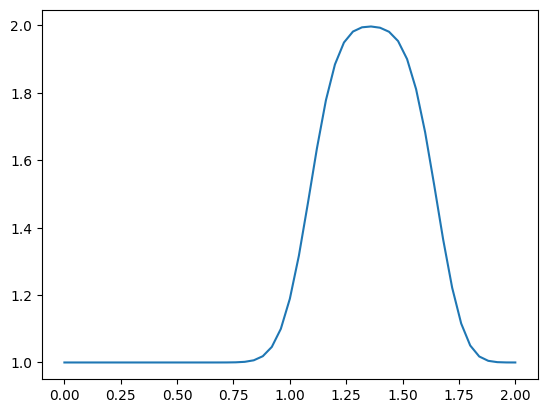

In [14]:
pyplot.plot(numpy.linspace(0, 2, nx), u);